In [2]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys; sys.path.append('../..') ; sys.path.append('../Dataset/'); 
from dataset import steamGamesDataset

sys.path.append('../Models/')
from autoEncoder import AutoEncoder


In [3]:
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
 
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")
	   
print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

device = torch.device('cuda')


Is CUDA supported by this system? True
CUDA version: 12.1
ID of current CUDA device: 0
Name of current CUDA device: NVIDIA GeForce RTX 4070


In [3]:
lhs_df = pd.read_csv('../Data/lhsDataset.csv')

onehot = pd.read_csv('../Data/OneHotVectors.csv',)
# print(onehot.iloc[0])

rhs_df = pd.read_csv('../Data/rhs.csv')
rhs_df = rhs_df['Median playtime forever']


Normalize


In [ ]:
lhs_df = (lhs_df.astype('Float64') - lhs_df.astype('Float64').min()) / (lhs_df.astype('Float64').max() - lhs_df.astype('Float64').min())


In [3]:
dataset = steamGamesDataset(lhs_df, rhs_df)
dataloader = data.DataLoader(dataset)


In [11]:
autoEncoder_dataset = steamGamesDataset(onehot, onehot)
autoEncoder_dataloader = data.DataLoader(autoEncoder_dataset, batch_size=512)


In [12]:
model = AutoEncoder(834, 1, device=device).to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e-8)


c:\Users\speed\OneDrive - Arizona State University\School\Masters\CSE572\Project\SteamGamesSuccessPrediction\ModelTesting\../Dataset\dataset.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inp_features = torch.tensor(self.lhs_df.iloc[index]).to(torch.float32)
c:\Users\speed\OneDrive - Arizona State University\School\Masters\CSE572\Project\SteamGamesSuccessPrediction\ModelTesting\../Dataset\dataset.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = torch.tensor(self.rhs_df.iloc[index]).to(torch.float32)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

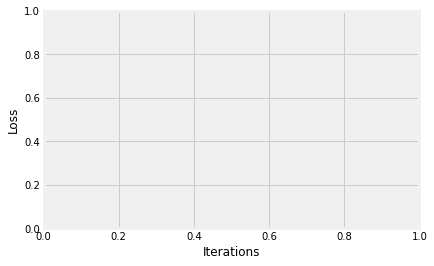

In [13]:
epochs = 20
outputs = []
losses = []
for epoch in range(1):
	for (image, output) in autoEncoder_dataloader:
		image = image.to(device)
		output = output.to(device)
	  # Reshaping the image to (-1, 784)
	#   image = image.reshape(-1, 28*28)
	   
	  # Output of Autoencoder
		reconstructed = model(image)
	   
	  # Calculating the loss function
		loss = loss_function(reconstructed, image)

		# The gradients are set to zero,
		# the gradient is computed and stored.
		# .step() performs parameter update
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		# Storing the losses in a list for plotting
		losses.append(loss)
	outputs.append((epochs, image, reconstructed))
 
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])


[tensor(541289.7500), tensor(567690.8125), tensor(594720.6250), tensor(622379.1250), tensor(650666.2500), tensor(679581.9375), tensor(709126.2500), tensor(739299.3125), tensor(770100.9375), tensor(801531.2500), tensor(833590.1875), tensor(866277.7500), tensor(899594.), tensor(933538.8125), tensor(968112.3750), tensor(1003314.4375), tensor(1039145.3125), tensor(1075604.7500), tensor(1112692.8750), tensor(1150409.5000), tensor(1188754.8750), tensor(1227728.8750), tensor(1267331.5000), tensor(1307562.8750), tensor(1348422.7500), tensor(1389911.2500), tensor(1432028.6250), tensor(1474774.5000), tensor(1518149.), tensor(1562152.), tensor(1606783.8750), tensor(1652044.3750), tensor(1697933.2500), tensor(1744451.1250), tensor(1791597.3750), tensor(1839372.3750), tensor(1887776.1250), tensor(1936808.3750), tensor(1986469.3750), tensor(2036758.7500), tensor(2087677.1250), tensor(2139224.), tensor(2191399.5000), tensor(2244203.5000), tensor(2297636.5000), tensor(2351697.7500), tensor(2406387.750

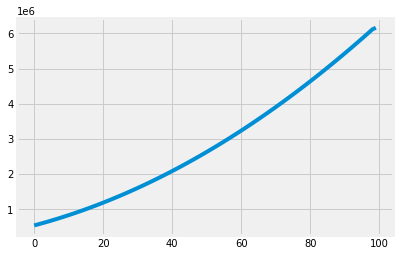

In [30]:
loss = [loss.detach().cpu() for loss in losses][-100:]
plt.plot(loss[-100:])
print(loss[-100:])


In [31]:
torch.save(model.encoder.state_dict(), '../Data/encoderparams.pt')
print(model.encoder.state_dict())


OrderedDict([('0.weight', tensor([[-9.8656e-06,  1.0964e-05, -3.4155e-07,  ..., -7.9004e-06,
          1.0332e-05, -6.9776e-06],
        [-1.6927e-04, -1.6149e-06, -1.3199e-06,  ..., -7.3093e-06,
          2.2630e-06, -5.4963e-06],
        [ 5.7800e-01, -1.1742e-06, -1.5164e-04,  ..., -7.9469e-06,
          1.1474e-05,  5.6635e-06],
        ...,
        [-5.8843e-06, -1.1080e-06,  1.7803e-06,  ...,  4.1961e-06,
         -1.0080e-05,  8.7804e-06],
        [ 1.7798e-06, -3.3344e-06,  7.4994e-06,  ...,  1.1462e-05,
         -6.0074e-08,  1.2579e-05],
        [-7.6781e-06,  4.3435e-06, -8.8104e-06,  ...,  4.3650e-06,
          1.1113e-05, -1.2778e-05]], device='cuda:0')), ('0.bias', tensor([ 1.2276e-05, -9.8189e-06, -1.3636e-03, -9.9756e-06,  4.9710e-04,
        -1.0767e-05,  4.5251e-02, -6.6086e-07,  7.2640e-02, -8.2057e-02,
         1.4344e-05, -8.7299e-06,  1.0499e-05, -1.3683e-06, -1.2524e-05,
         6.9118e-06, -5.7137e-06, -2.9869e-06,  1.2836e-05, -1.6724e-02,
        -1.4164e-01,

In [8]:
lhs_df = pd.read_csv('../Data/lhsDataset.csv')

onehot_enc = pd.read_csv('../Data/encoded_oh.csv')


rhs_df = pd.read_csv('../Data/rhs.csv')
rhs_df = rhs_df['Median playtime forever'].to_frame()

lhs_df = pd.concat([lhs_df, onehot_enc], axis=1)


In [9]:
lhs_df = (lhs_df.astype('Float64') - lhs_df.astype('Float64').min()) / (lhs_df.astype('Float64').max() - lhs_df.astype('Float64').min())


In [10]:
class NN(nn.Module):
    def __init__(self,input_size, device='cpu'):
        super().__init__()
        
        
        self.hidden = nn.Sequential(
            nn.Linear(input_size, input_size),
            nn.ReLU(),
            nn.Linear(input_size, input_size),
            nn.ReLU(),
            nn.Linear(input_size, input_size),
            nn.Sigmoid(),
            nn.Linear(input_size, 1))
        
        
    def forward(self, x):
        return self.hidden(x)


In [11]:
model = NN(197, device=device).to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4, weight_decay = 1e-8)


In [12]:
gdataset = steamGamesDataset(lhs_df, rhs_df)
gdataloader = data.DataLoader(gdataset, batch_size=1024)


In [13]:
epochs = 3
outputs = []
losses = []
i = 0
for epoch in range(epochs):
  print(f'Epoch: {epoch}', end='\r')
  for (image, output) in gdataloader:
    i += 1
    if i % 10: print(f'itteration: {i}', end='\r')
    image = image.to(device)
    output = output.to(device)
    # Reshaping the image to (-1, 784)
    #   image = image.reshape(-1, 28*28)
      
    # Output of Autoencoder
    reconstructed = model.forward(image)
      
    # Calculating the loss function
    loss = loss_function(reconstructed, image)

    # The gradients are set to zero,
    # the gradient is computed and stored.
    # .step() performs parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

		# Storing the losses in a list for plotting
    losses.append(loss.detach().cpu())


c:\Users\speed\OneDrive - Arizona State University\School\Masters\CSE572\Project\SteamGamesSuccessPrediction\ModelTesting\../Dataset\dataset.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inp_features = torch.tensor(self.lhs_df.iloc[index]).to(torch.float32)
c:\Users\speed\OneDrive - Arizona State University\School\Masters\CSE572\Project\SteamGamesSuccessPrediction\ModelTesting\../Dataset\dataset.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = torch.tensor(self.rhs_df.iloc[index]).to(torch.float32)


c:\Users\speed\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1024, 197])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


c:\Users\speed\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36, 197])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


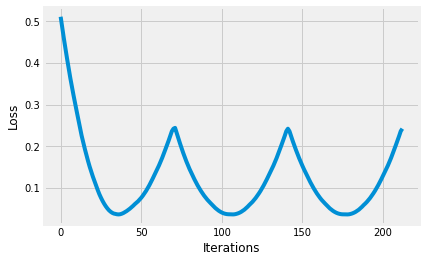

In [14]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses)


In [15]:
print(sum(losses)/len(losses))


tensor(0.1226)


In [17]:
losses = []
for (image, output) in gdataloader:
    if i > 500:
        break
    i += 1
    if i % 10 == 0: print(f'itteration: {i}', end='\r')
    image = image.to(device)
    output = output.to(device)
    # Reshaping the image to (-1, 784)
    #   image = image.reshape(-1, 28*28)
      
    # Output of Autoencoder
    reconstructed = model.forward(image)
      
    # Calculating the loss function
    loss = loss_function(reconstructed, image)

		# Storing the losses in a list for plotting
    losses.append(loss.detach().cpu())


c:\Users\speed\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([36, 197])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [18]:
print(sum(losses)/len(losses))


tensor(0.1060)
